In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import matplotlib.pyplot as plt
os.chdir("/Users/burke/Documents/research/bpCog/microsim")
from microsim.population import NHANESDirectSamplePopulation

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pop = NHANESDirectSamplePopulation(n=100000, year=1999)
pop.advance_multi_process(20)

processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19


In [8]:
dementia = [person._dementia for i, person in pop._people.iteritems()]
finalAge = [person._age[-1] for i, person in pop._people.iteritems()]

In [9]:
df = pd.DataFrame({'age' : finalAge, 'dementia' : dementia})
df['age10'] =  pd.qcut(df.age,10)

In [22]:
prevalenceByAgeGroup = df.groupby('age10')['dementia'].mean()
prevalenceByAgeGroup

age10
(18.999, 43.0]    0.000781
(43.0, 48.0]      0.001590
(48.0, 52.0]      0.003227
(52.0, 57.0]      0.005088
(57.0, 61.0]      0.007142
(61.0, 65.0]      0.015093
(65.0, 71.0]      0.030790
(71.0, 77.0]      0.062979
(77.0, 85.0]      0.160692
(85.0, 105.0]     0.460650
Name: dementia, dtype: float64

<BarContainer object of 10 artists>

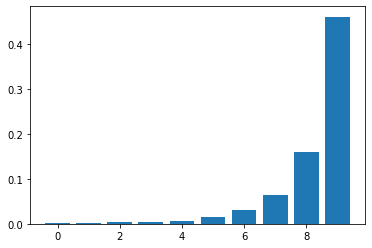

In [25]:
plt.bar(prevalenceByAgeGroup.index.codes, prevalenceByAgeGroup.values)